In [14]:
import sys, os
import numpy as np

In [2]:
sys.path.append("/home/anton/BigMac/skoltech/CRISPR_research/notebooks/")

In [3]:
import utils.plot_utils as pu
import utils.hierarcical_utils as hu
import utils.hamiltonian_utils as hamu

In [96]:
from importlib import reload
hu = reload(hu)
hamu = reload(hamu)
pu = reload(pu)

In [164]:
# pairs_path = "../../data/ES/ES3_R1_pairs.txt"
# lines_path = "../../data/ES/ES3_R1_spacers.txt"

# pairs_path = "../../data/ES_reload/ES/ES2_R1_pairs.txt"
# lines_path = "../../data/ES_reload/ES/ES2_R1_spacers.txt"

# pairs_path = "../data/ES/ES5_R1_pairs.txt"
# lines_path = "../data/ES/ES5_R1_spacers.txt"

# pairs_path = "../../data/SlO_10/SlO1_R1_pairs_10.txt"
# lines_path = "../../data/SlO_10/SlO1_R1_spacers_10.txt"

pairs_path = "../../data/clostr_06_07/good_1-10_R1_06_07pairsq10.txt"
pairs2_path = "../../data/clostr_06_07/good_1-10_R2_06_07pairsq10.txt"

#pairs_path = "../data/Thermus/III/Vesuvius (1)_III_pairs.txt"
#lines_path = "../data/Thermus/III/Vesuvius (1).III.txt"

# with open(lines_path) as f:
#     lines = [x[:] for x in f.readlines()][1::] #CAREFULLLL

with open(pairs_path) as f:
    pairs = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]
with open(pairs2_path) as f:
    pairs2 = [[y[:] for y in x[:-2].split(' ') ] for x in f.readlines()]
    
lines = []
for p in pairs:
    lines.append(p[0])
    lines.append(p[1])
    
print(len(lines))

2516852


In [7]:
lines[:5]

['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
 'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT',
 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
 'ATACAACCATATATTTACCAATTATGTACTTATGAA',
 'CCAATTAAGTTACTAGATAAAAAAATAGAACAAATTA']

In [8]:
pairs[:2]

[['AAAGGTGACCATTGATTTCTTTCAGTTTCGGGAATA',
  'TGTTTTCCATAAACATTTCTAATTGACTTTTATTGT'],
 ['TGGTATATCATACTCGTGCATTGCCTGCTCCACATT',
  'ATACAACCATATATTTACCAATTATGTACTTATGAA']]

In [9]:
od = hu.get_ordered_spacers(lines)

In [10]:
answ, sp_to_n, cl_to_n, n_to_cl = hu.squash(od, 6)

A Jupyter Widget

In [19]:
counter = 0
true_keys = set()
for item in answ.items():
    if item[1] > 3:
        counter += 1
        true_keys.add(item[0])

In [20]:
cl_to_n = dict(zip(list(true_keys), np.arange(len(true_keys))))

In [21]:
len(cl_to_n)

227

In [22]:
pairs_cl = hu.process_pairs(pairs, cl_to_n, 6)

A Jupyter Widget

In [23]:
gr = hamu.pairs_to_gr(pairs_cl, len(cl_to_n))

In [24]:
np.save("./110", gr)

In [25]:
import pickle

In [26]:
pickle.dump(cl_to_n, open("./110_cl_to_n", 'wb'))
pickle.dump(answ, open("./110_nd", 'wb'))

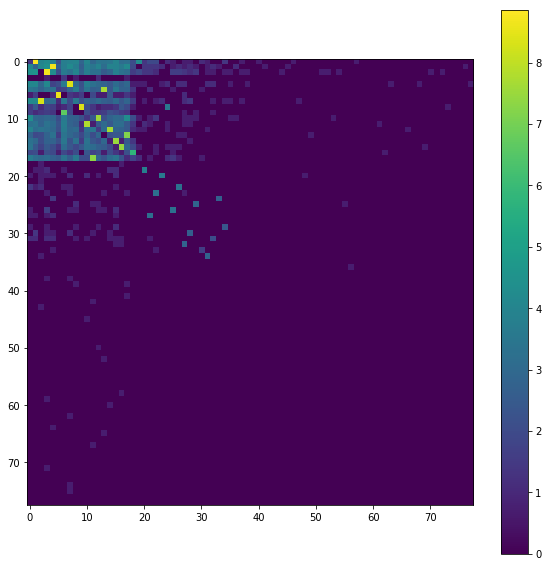

In [11]:
pu.plot_gr(gr, log =1)

In [276]:
arrays, weights = hamu.restore_arrays(gr)

In [190]:
mean_weights = [np.mean(x) for x in weights]

In [191]:
lens = [len(x) for x in arrays]

In [192]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

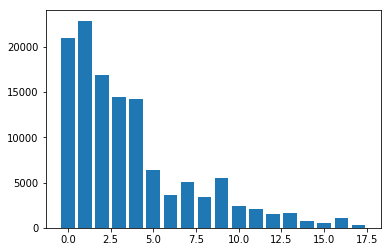

In [193]:
plt.bar(np.arange(18), mean_weights[:18])

In [64]:
mean_weights = [np.mean(x) for x in weights]

In [66]:
lens = [len(x) for x in arrays]

In [70]:
import matplotlib.pyplot as plt

<Container object of 18 artists>

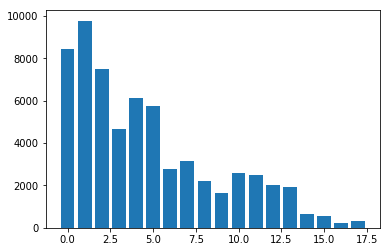

In [71]:
plt.bar(np.arange(18), mean_weights[:18])

In [196]:
with open("../../data/answers/Clo_013316.txt") as f:
    strain1 = [x[:-2].split(",") for x in f.readlines()]

In [260]:
with open("../../data/answers/Clo_009089.txt") as f:
    strain2 = [x[:-2].split(",") for x in f.readlines()]

# investigation

In [187]:
import editdistance as ed
from tqdm import tqdm_notebook

In [106]:
arrays[1]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]

In [198]:
mask = []
for i in range(25):
    if a_close_to_any_b(arrays[i], cl_1):
        mask.append(1)
    elif a_close_to_any_b(arrays[i], cl_2):
        mask.append(2)
    else:
        mask.append(0)


In [199]:
mask

[0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1]

In [123]:
ed.eval([72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8], [ 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8])

2

In [321]:
def a_close_to_b(a, b, t = 2):
    return ed.eval(a, b) <= 2

def a_close_to_any_b(a, b, t = 2):
    res = [a_close_to_b(a, x, t) for x in b]
    return any(res), np.where(res)
        

In [239]:
cl1 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain1]

In [261]:
cl2 = [[cl_to_n[hu.find_closest(cl_to_n, x)[1]] for x in y] for y in strain2]

In [241]:
[[hu.find_closest(cl_to_n, x) for x in y] for y in strain2]

[[(2, 'CTAGAATTAGAACTCATTATTAAAACCATTCTTGCAAG'),
  (0, 'TAATCTGACACATACAAAGTTGAACCTAGTGGTACG'),
  (0, 'AAAAGCGTTCTTAAATCGTTACTTAACTCTTGCAAA'),
  (0, 'TGGTATATCATACTCGTGCATTGCCTGCTCCACATT'),
  (0, 'ATACAACCATATATTTACCAATTATGTACTTATGAA'),
  (0, 'TTTTTTAACTTTTCAGTTCTCACAGGCGTTTCATC'),
  (0, 'TTCATATTCCAAGCGTTTTGCTTACACTTAATAGAA'),
  (1, 'AAAATTAAATTTCATGCTCTTAGACATACATATGCAA'),
  (1, 'TAGATTGCTTTCAAATTACCTCTTGTATAGCGTCTT'),
  (1, 'TTGCTCCGCTATGCCTTGCGCTCTCTAATATCGCTTA'),
  (1, 'TGAACTTTAATCGGTTTTATACAACAATATAACGC'),
  (0, 'TCACACATGAGCAATATCGAAACAGGCAAATCTACA'),
  (0, 'TTCGTAAAATAACAATTATCTGGAATATGAGAAGTT'),
  (0, 'CACTCTTAAGTTGTGACCTATCTGATATATGATTAA'),
  (2, 'TCAATATCTATATTAAGTTTATTTTTAAAAACATCT')],
 [(1, 'GTAGAGTCTTTATATGGTAGAGGTGGAATATATAAGT'),
  (1, 'AACTCTTCAATATCTCCTAATCGTTCAATATAATTCT'),
  (1, 'ACTGTATGCCATCTAAATGCATCATACAAACTTATTT'),
  (0, 'TATACTTCCTAATGCAATCAAATAAGTACCTAAAAT'),
  (1, 'TTCGCAACTTATGATGGTGAAATGATTACATTAACAG'),
  (2, 'AATATAACAAAGTGGATGTTCTCTAAAAATAAAGAG')],
 [(1,

In [217]:
import networkx as nx
import matplotlib.pyplot as plt

In [245]:
def prepare_pos(arrs, start_x = 0, start_y = 0):
    pos = {}
    x, y = 0, 0
    for arr in arrs:
        print(arr)
        for el in arr:
            pos[el] = (x,y)
            x += 1
        y += 1
        x = 0
    return pos, x, y

In [277]:
def create_shift_pos(pos, x_shift = 0, y_shift = -0.2):
    s_pos = {}
    for item in pos.items():
        s_pos[item[0]] = (item[1][0] + x_shift, item[1][1] + y_shift)
    return s_pos

In [295]:
def add_pos(arr, pos ):
    vertexes = []
    for x in [x for y in arr for x in y]:
        if not x in shift_pos.keys():
            vertexes.append(x)

    for i, v in enumerate(vertexes):
        pos[v] = (i, -1)
    
    return pos

In [270]:
G1 = nx.DiGraph()
for arr in cl1:
    G1.add_path(arr)
    
G2 = nx.DiGraph()
for arr in cl2:
    G2.add_path(arr)
pos = prepare_pos(cl2 + cl1)[0]

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]
[42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23]
[188, 206, 62, 178, 169, 89, 197, 47]
[63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5]
[214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189]
[218, 77, 99, 119, 135, 217]
[222, 102, 176]
[94, 144, 4, 51, 90, 173]
[16, 3, 93, 147, 174, 56, 112, 126, 211, 39, 115, 146, 37, 31, 96, 6, 98, 182, 138]
[210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172]
[95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23]
[151, 164, 223, 203]
[15, 26, 142, 166, 219]
[161, 54, 150, 168]
[149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73]
[143, 76, 226, 11, 198, 148, 202, 84, 68]
[16, 3, 93, 60, 97, 35, 75, 130, 209, 2, 134, 114, 162, 23, 17, 137, 44, 180, 66, 140, 123, 117, 124, 80, 110, 48]


In [298]:
Gansw = nx.DiGraph()
for arr in arrays:
    Gansw.add_path(arr)

shift_pos = create_shift_pos(pos)
shift_pos = add_pos(arrays, shift_pos)

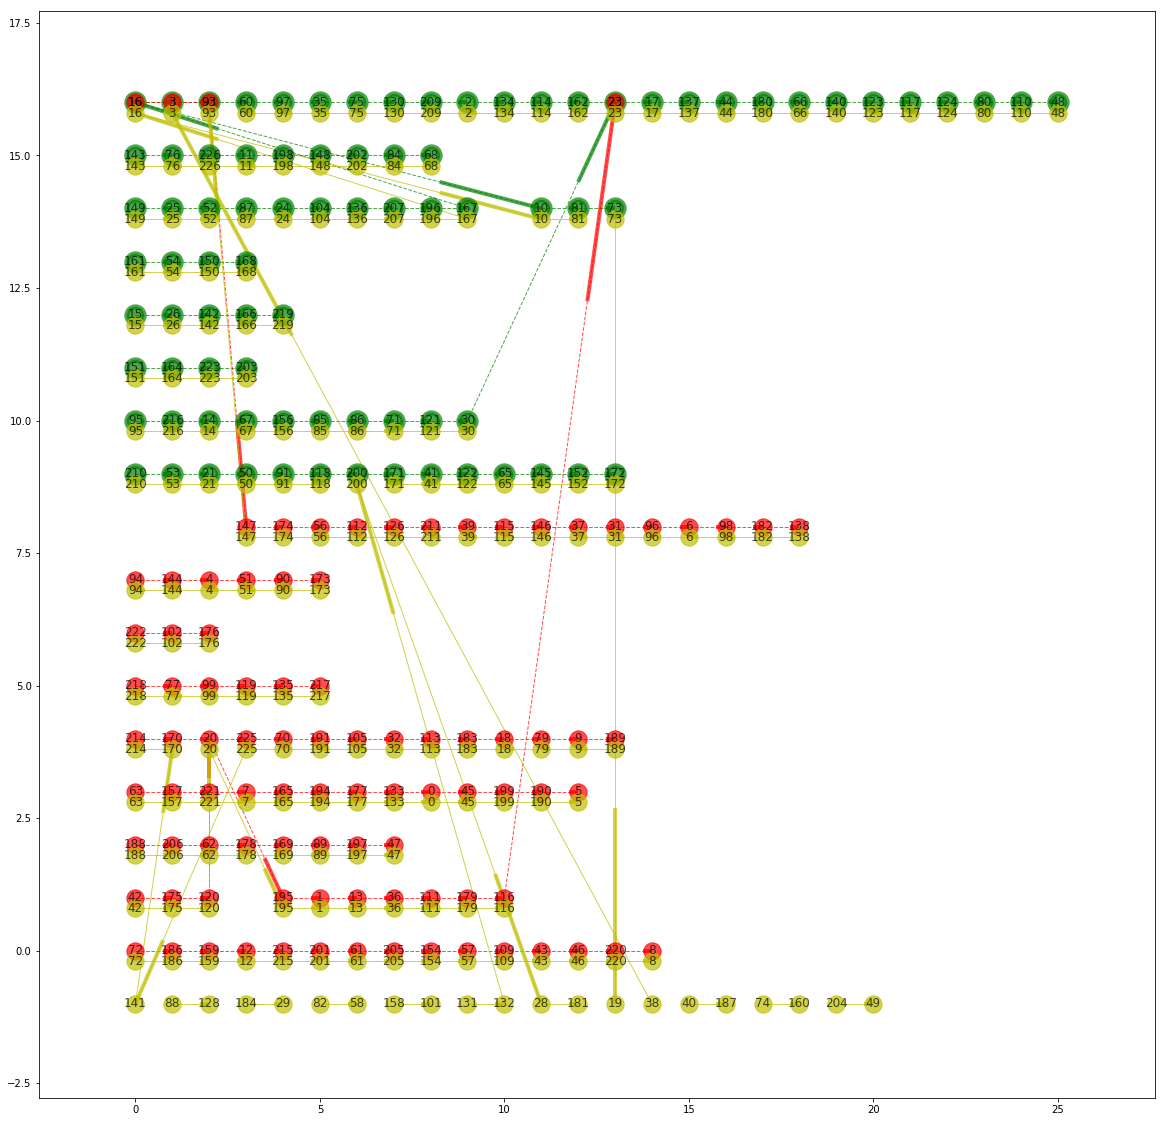

In [463]:
#nx.draw_networkx(G,  alpha = 0.5, pos=pos)
f = plt.figure(1, figsize=(20, 20))
ax = f.add_subplot(111)
nx.draw_networkx(G1, node_color='g', edge_color= 'g', style='dashed', linewidths=5, alpha = 0.7, pos=pos, ax=ax)
nx.draw_networkx(G2, node_color='r', edge_color= 'r', style='dashed', alpha = 0.7, pos=pos, ax=ax)

nx.draw_networkx(Gansw, node_color='y', edge_color='y', alpha = 0.7, pos=shift_pos,ax=ax)

In [505]:
gr[88,128]

1106.0

In [516]:
gr[141, 170]

152.0

In [ ]:
f.savefig(".")

In [464]:
f.savefig("./Clostridium_1:10.png")

### Coverage

In [309]:
cl1[:-1]

[[210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23],
 [151, 164, 223, 203],
 [15, 26, 142, 166, 219],
 [161, 54, 150, 168],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73],
 [143, 76, 226, 11, 198, 148, 202, 84, 68]]

In [347]:
for arr in cl2:
    print(a_close_to_any_b(arr, arrays))

(True, (array([1]),))
(True, (array([4]),))
(True, (array([9]),))
(True, (array([8]),))
(False, (array([], dtype=int64),))
(False, (array([], dtype=int64),))
(True, (array([3]),))
(False, (array([], dtype=int64),))
(False, (array([], dtype=int64),))


In [351]:
cl2[-2]

[94, 144, 4, 51, 90, 173]

In [335]:
arrays

[[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93],
 [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [176, 102, 222],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116],
 [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81],
 [217, 135, 119, 99, 77, 218],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [48,
  110,
  80,
  124,
  117,
  123,
  140,
  66,
  180,
  44,
  137,
  17,
  23,
  162,
  114,
  134,
  2,
  209,
  130,
  75,
  35,
  97,
  60],
 [15, 26, 142, 166, 219],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30],
 [161, 54, 150, 168],
 [171, 41, 122, 65, 145, 152, 172],
 [210, 53, 21, 50, 91, 118],
 [88, 128],
 [151, 164, 223, 203],
 [68, 84, 202, 148, 198, 11, 226, 76, 143],
 [184, 29],
 [82, 58],
 [158, 101],
 [131, 132, 200, 28, 181],
 [73, 19],
 [38, 3],
 [40, 187],
 [74, 160]

In [289]:
arrays

[[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93],
 [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [176, 102, 222],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116],
 [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81],
 [217, 135, 119, 99, 77, 218],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [48,
  110,
  80,
  124,
  117,
  123,
  140,
  66,
  180,
  44,
  137,
  17,
  23,
  162,
  114,
  134,
  2,
  209,
  130,
  75,
  35,
  97,
  60],
 [15, 26, 142, 166, 219],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30],
 [161, 54, 150, 168],
 [171, 41, 122, 65, 145, 152, 172],
 [210, 53, 21, 50, 91, 118],
 [88, 128],
 [151, 164, 223, 203],
 [68, 84, 202, 148, 198, 11, 226, 76, 143],
 [184, 29],
 [82, 58],
 [158, 101],
 [131, 132, 200, 28, 181],
 [73, 19],
 [38, 3],
 [40, 187],
 [74, 160]

In [267]:
ed.eval(strain2[1][3], strain2[4][2])

3

In [268]:
hu.find_closest(answ, strain2[1][3])

(2, 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA')

In [269]:
hu.find_closest(answ, strain2[4][2])

(3, 'TGGTGAACAATAAAACAATCATCTAAAGACGAAGAAAA')

In [264]:
cl2

[[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189],
 [218, 77, 99, 119, 135, 217],
 [222, 102, 176],
 [94, 144, 4, 51, 90, 173],
 [16,
  3,
  93,
  147,
  174,
  56,
  112,
  126,
  211,
  39,
  115,
  146,
  37,
  31,
  96,
  6,
  98,
  182,
  138]]

In [426]:
def search_best_alignment(a, b, t = 2):
    answ = ('', '')
    indexes = (-1,-1,-1,-1)
    b_index = -1
    
    for i, x in enumerate(b):
        curr_answ, curr_indexes = best_alignment(a, x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        curr_answ, curr_indexes = best_alignment(a[::-1], x, t)
        if len(curr_answ[0]) >= len(answ[0]) and len(curr_answ[1]) >= len(answ[1]):
            answ = curr_answ
            indexes = curr_indexes
            b_index = i
        
    return answ, b_index, indexes

In [368]:
search_any_occurences_a_in_b('asasaas', ['aqqwwwe', 'asa', 'a'])

('b_in_a', array([1, 2]))

In [416]:
def best_alignment(a, b, t):
    '''worst implementation of best alignment ever'''
    answ = ('','')
    i1a, i2a, j1a, j2a = -1,-1,-1,-1
    for i1 in range(0, len(a)):
        for i2 in range(i1 + 1, len(a) + 1):
            check_a = a[i1:i2]
            for j1 in range(0, len(b)):
                for j2 in range(j1 + 1,  len(b) + 1):
                    check_b = b[j1:j2]
                    if ed.eval(check_a, check_b) <= t and len(check_a) >= len(answ[0]) and len(check_b) >= len(answ[1]):
                        answ = (check_a, check_b)
                        i1a, i2a, j1a, j2a = i1,i2,j1,j2
    
    return answ, (i1a,i2a,j1a,j2a)


In [475]:
mask1 = []
for c in cl1:
    print(c)
    a = search_best_alignment(c, arrays, 2)
    print(a)
    mask1.append(a[1])
    print("....")

[210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172]
(([118, 200, 171, 41, 122, 65, 145, 152, 172], [171, 41, 122, 65, 145, 152, 172]), 14, (5, 14, 0, 7))
....
[95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23]
(([95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23], [95, 216, 14, 67, 156, 85, 86, 71, 121, 30]), 12, (0, 11, 0, 10))
....
[151, 164, 223, 203]
(([151, 164, 223, 203], [151, 164, 223, 203]), 17, (0, 4, 0, 4))
....
[15, 26, 142, 166, 219]
(([15, 26, 142, 166, 219], [15, 26, 142, 166, 219]), 11, (0, 5, 0, 5))
....
[161, 54, 150, 168]
(([161, 54, 150, 168], [161, 54, 150, 168]), 13, (0, 4, 0, 4))
....
[149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73]
(([149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73], [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81]), 6, (0, 14, 0, 13))
....
[143, 76, 226, 11, 198, 148, 202, 84, 68]
(([68, 84, 202, 148, 198, 11, 226, 76, 143], [68, 84, 202, 148, 198, 11, 226, 76, 143]), 18, (0, 9, 0, 9))
....
[16, 3, 93,

In [476]:
mask1.append(15)
mask1.append(16)

In [477]:
sorted(mask1)

[6, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [467]:
mask2 = []
for c in cl2:
    print(c)
    a = search_best_alignment(c, arrays, 2)
    print(a)
    mask2.append(a[1])
    print("....")

[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]
(([72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8], [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8]), 1, (0, 15, 0, 15))
....
[42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23]
(([42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23], [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116]), 4, (0, 12, 0, 11))
....
[188, 206, 62, 178, 169, 89, 197, 47]
(([188, 206, 62, 178, 169, 89, 197, 47], [188, 206, 62, 178, 169, 89, 197, 47]), 9, (0, 8, 0, 8))
....
[63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5]
(([63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5], [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5]), 8, (0, 13, 0, 13))
....
[214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189]
(([189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 20, 170, 214], [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214]), 5, (0, 14, 0, 14))
....
[218, 77, 99, 

In [469]:
sorted(mask2)

[0, 1, 2, 3, 4, 5, 7, 8, 9]

In [429]:
for i in [1,4,9,8,5,7,3,2,0]:
    print(mean_weights[i])

22887.928571428572
14183.2
5471.714285714285
3420.75
6381.923076923077
5051.2
14462.5
16938.8
21024.0625


In [430]:
for i in range(10,20):
    print(mean_weights[i])

2447.7272727272725
2036.75
1491.2222222222222
1580.6666666666667
724.0
581.4
1106.0
340.3333333333333
135.625
6.0


<Container object of 20 artists>

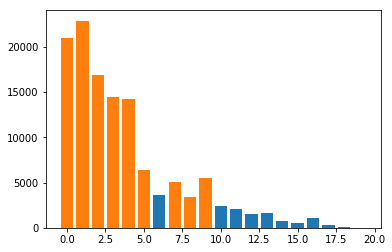

In [487]:
plt.bar(np.arange(20), mean_weights[:20] * m1)
plt.bar(np.arange(20), mean_weights[:20] * m2)

In [478]:
mask1

[14, 12, 17, 11, 13, 6, 18, 10, 15, 16]

In [486]:
m1 = np.zeros(20)
m1[np.array(mask1)] = 1
m2 = np.zeros(20)
m2[np.array(mask2)] = 1

In [481]:
for x in arrays:
    print(best_alignment(cl1[1], x, 2))

(([30, 23], [147, 93]), (9, 11, 15, 17))
(([30, 23], [220, 8]), (9, 11, 13, 15))
(([30, 23], [144, 94]), (9, 11, 4, 6))
(([30, 23], [102, 222]), (9, 11, 1, 3))
(([30, 23], [179, 116]), (9, 11, 9, 11))
(([30, 23], [170, 214]), (9, 11, 12, 14))
(([30, 23], [10, 81]), (9, 11, 11, 13))
(([30, 23], [77, 218]), (9, 11, 4, 6))
(([30, 23], [190, 5]), (9, 11, 11, 13))
(([30, 23], [197, 47]), (9, 11, 6, 8))
(([121, 30, 23], [137, 17, 23]), (8, 11, 10, 13))
(([30, 23], [166, 219]), (9, 11, 3, 5))
(([95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23], [95, 216, 14, 67, 156, 85, 86, 71, 121, 30]), (0, 11, 0, 10))
(([30, 23], [150, 168]), (9, 11, 2, 4))
(([30, 23], [152, 172]), (9, 11, 5, 7))
(([30, 23], [91, 118]), (9, 11, 4, 6))
(([30, 23], [88, 128]), (9, 11, 0, 2))
(([30, 23], [223, 203]), (9, 11, 2, 4))
(([30, 23], [76, 143]), (9, 11, 7, 9))
(([30, 23], [184, 29]), (9, 11, 0, 2))
(([30, 23], [82, 58]), (9, 11, 0, 2))
(([30, 23], [158, 101]), (9, 11, 0, 2))
(([30, 23], [28, 181]), (9, 11, 3, 5))
(([

In [434]:
n_to_cl[93]

'TAAGAATTAACTAATGTGAATTTTTTAGACATGTCA'

In [435]:
cl2

[[72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116, 23],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [214, 170, 20, 225, 70, 191, 105, 32, 113, 183, 18, 79, 9, 189],
 [218, 77, 99, 119, 135, 217],
 [222, 102, 176],
 [94, 144, 4, 51, 90, 173],
 [16,
  3,
  93,
  147,
  174,
  56,
  112,
  126,
  211,
  39,
  115,
  146,
  37,
  31,
  96,
  6,
  98,
  182,
  138]]

In [432]:
cl1

[[210, 53, 21, 50, 91, 118, 200, 171, 41, 122, 65, 145, 152, 172],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30, 23],
 [151, 164, 223, 203],
 [15, 26, 142, 166, 219],
 [161, 54, 150, 168],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81, 73],
 [143, 76, 226, 11, 198, 148, 202, 84, 68],
 [16,
  3,
  93,
  60,
  97,
  35,
  75,
  130,
  209,
  2,
  134,
  114,
  162,
  23,
  17,
  137,
  44,
  180,
  66,
  140,
  123,
  117,
  124,
  80,
  110,
  48]]

In [438]:
cl_to_n[hu.find_closest(cl_to_n, 'CAAACAAGTGTAGGATAAACTTTCCTTGCCCAGTAT')[1]]

194

In [439]:
n_to_cl[165] 

'CTTATACTTAGTTAGAACTATATATCGACACAAATA'

In [440]:
hu.find_closest(cl_to_n, 'CAAACAAGTGTAGGATAAACTTTCCTTGCCCAGTAT')

(2, 'ACAAACAAGTGTAGGATAAACTTTCCTTGCCCAGTATA')

In [441]:
strain2[-1][:3]

['TTGTAGAATCAACAATAGCATATACTAAAACATCC',
 'AGAATATTAGCAATATCAACGAGTATTTAGAAACTT',
 'AGGATAAAGAAAAGACTCACACAAGACACAGTGTCAG']

In [442]:
strain1[-1][:3]

['TTGTAGAATAAACAATAGCATATACTAAAACATCC',
 'AGAATATTAGCAATATCAACGAGTATTTAGAAACTT',
 'AGGATAAAGAAAAGACTCACACAAGACACAGTGTCAG']

In [ ]:
AACATCTT

In [504]:
gw = 0

for a in arrays:
    for x,y in zip(a, a[1:]):

        gw += gr[x,y]
        
(gr.sum() - gw) / gw

0.019971048463834084

In [490]:
(gr.sum() - gw) / gw

1.031190329771076

In [502]:
gr[:200,:200].sum()

969811.0

In [498]:
gw

619551.0

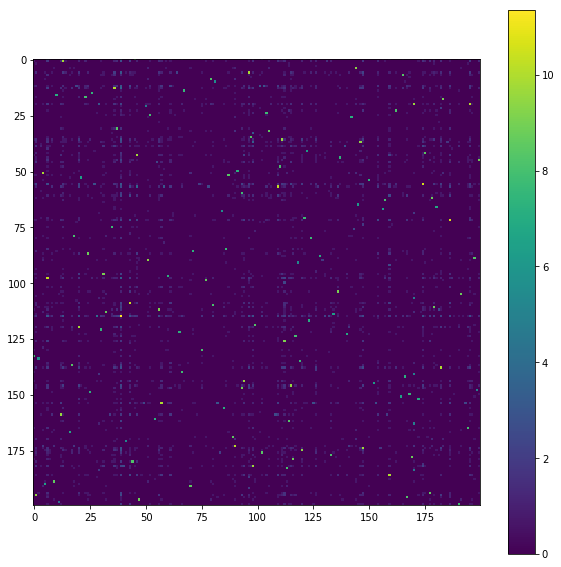

In [501]:
pu.plot_gr(gr[:200,:200], log = 1)

In [517]:
arrays

[[138, 182, 98, 6, 96, 31, 37, 146, 115, 39, 211, 126, 112, 56, 174, 147, 93],
 [72, 186, 159, 12, 215, 201, 61, 205, 154, 57, 109, 43, 46, 220, 8],
 [173, 90, 51, 4, 144, 94],
 [176, 102, 222],
 [42, 175, 120, 20, 195, 1, 13, 36, 111, 179, 116],
 [189, 9, 79, 18, 183, 113, 32, 105, 191, 70, 225, 141, 170, 214],
 [149, 25, 52, 87, 24, 104, 136, 207, 196, 167, 16, 10, 81],
 [217, 135, 119, 99, 77, 218],
 [63, 157, 221, 7, 165, 194, 177, 133, 0, 45, 199, 190, 5],
 [188, 206, 62, 178, 169, 89, 197, 47],
 [48,
  110,
  80,
  124,
  117,
  123,
  140,
  66,
  180,
  44,
  137,
  17,
  23,
  162,
  114,
  134,
  2,
  209,
  130,
  75,
  35,
  97,
  60],
 [15, 26, 142, 166, 219],
 [95, 216, 14, 67, 156, 85, 86, 71, 121, 30],
 [161, 54, 150, 168],
 [171, 41, 122, 65, 145, 152, 172],
 [210, 53, 21, 50, 91, 118],
 [88, 128],
 [151, 164, 223, 203],
 [68, 84, 202, 148, 198, 11, 226, 76, 143],
 [184, 29],
 [82, 58],
 [158, 101],
 [131, 132, 200, 28, 181],
 [73, 19],
 [38, 3],
 [40, 187],
 [74, 160]

In [518]:
pickle.dump(arrays, open("../../data/clostr_res/arrays_110", 'wb'))

In [519]:
pickle.dump(n_to_cl, open("../../data/clostr_res/n_to_cl_110", 'wb'))

In [530]:
def barplot(*args):
    for arg in args:
        plt.bar(np.arange(len(arg)), arg)

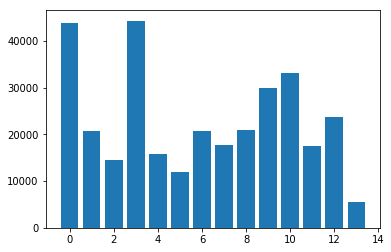

In [545]:
barplot(weights[1])

In [547]:
i = 2
for a,b in zip(range(len(arrays_as_spacers[i])), [count_as_in_b('CG', x) for x in arrays_as_spacers[i]]):
    print(a,b)

0 11
1 6
2 15
3 11
4 11
5 10


In [534]:
def count_as_in_b(a, b):
    counter = 0
    for c in b:
        if c in a: counter += 1
    return counter

In [532]:
arrays_as_spacers = [[n_to_cl[x] for x in arr] for arr in arrays]

In [521]:
weights[0]

[21099.0,
 15831.0,
 31333.0,
 19249.0,
 8640.0,
 4203.0,
 13395.0,
 13405.0,
 85082.0,
 28828.0,
 12317.0,
 9351.0,
 9156.0,
 39214.0,
 17693.0,
 7589.0]